<div style="background-color:#e0f7fa; border-left: 8px solid #00796b; padding: 20px; margin: 20px 0; border-radius: 8px;">
    <h1 style="text-align:center; color:#004d40; font-size: 28px; margin-bottom: 10px;">Workshop2 - K-Means Clustering</h1>
    <h3 style="text-align:center; color:#00695c;">June 5, 2025</h3>
    <hr style="border-top: 1px solid #004d40;">
    <p style="font-size: 16px; line-height: 1.5; color:#333;">
    This notebook demonstrates the application of the <b>KMeans clustering</b> algorithm to segment customer data. We’ll walk through data preparation, model application, and a crucial method for determining the optimal number of clusters. The goal is to identify distinct customer groups based on their purchasing behavior — <b>Recency</b>, <b>Frequency</b>, and <b>MonetaryValue</b> — to enable targeted business strategies such as personalized marketing, loyalty programs, and churn prevention.
    </p>
    <p style="font-size: 16px; color:#555;"><b>Contributors:</b> Sanuja Vihanga Senadeera, Naveen Karan Krishna, Thi Anh Tram Le, Mayra Geraldine Reinoso Varon, Justin Kyle Pedro</p>
</div>


<div style="background-color:#f1f8e9; border-left: 6px solid #689f38; padding: 15px 20px; margin: 15px 0; border-radius: 6px;">
    <h2 style="color:#33691e; margin-top:0;">1. Environment Setup: Installing Necessary Libraries</h2>
    <p style="font-size: 15px; line-height: 1.5; color:#333;">
    This initial step ensures that all required Python libraries, especially <b>yellowbrick</b> for enhanced visualization, are available in our environment. Running this command once sets up our toolbox for the analysis.
    </p>
</div>

In [41]:
!pip install yellowbrick

<div style="background-color:#f1f8e9; border-left: 6px solid #689f38; padding: 15px 20px; margin: 15px 0; border-radius: 6px;">
    <h2 style="color:#33691e; margin-top:0;">2. Importing Libraries</h2>
    <p style="font-size: 15px; line-height: 1.5; color:#333;">
    Here we import the essential Python libraries for data manipulation (<b>pandas</b>), plotting (<b>matplotlib.pyplot</b>), K-Means clustering (<b>sklearn.cluster.KMeans</b>), data scaling (<b>sklearn.preprocessing.StandardScaler</b>), and the Elbow Method visualization (<b>yellowbrick.cluster.KElbowVisualizer</b>).
    </p>
</div>

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer
from kneed import KneeLocator
import warnings
warnings.filterwarnings('ignore')    # ignor warning message

<div style="background-color:#f1f8e9; border-left: 6px solid #689f38; padding: 15px 20px; margin: 15px 0; border-radius: 6px;">
    <h2 style="color:#33691e; margin-top:0;">3. Data Loading and Initial Inspection</h2>
    <p style="font-size: 15px; line-height: 1.5; color:#333;">
    We start by defining our raw customer data and loading it into a <b>pandas</b> DataFrame. This allows us to view the initial structure and data types, ensuring it’s ready for processing. The <code>df.info()</code> command provides a quick summary, confirming non-null counts and data types.
    </p>
</div>

In [45]:
data = {
    'CustomerID':[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
    'Segment':['Segment1', 'Segment2', 'Segment1', 'Segment3', 'Segment2', 'Segment1', 'Segment3',
               'Segment2', 'Segment1', 'Segment3', 'Segment2', 'Segment1', 'Segment3', 'Segment2',
               'Segment1', 'Segment3', 'Segment2', 'Segment1', 'Segment3', 'Segment2'],
    'Recency':[10, 5, 15, 3, 8, 20, 2, 6, 18, 1, 4, 12, 2, 7, 16, 1, 3, 9, 2, 5],
    'Frequency':[25, 40, 10, 60, 35, 15, 70, 45, 20, 80, 55, 30, 75, 50, 22, 85, 65, 28, 90, 60],
    'MonetaryValue': [500, 1000, 250, 1500, 800, 300, 1800, 900, 400, 2000, 1100, 600, 1700, 950,
                      350, 2200, 1300, 550, 2400, 1200]
}

df = pd.DataFrame(data)
print("Original DataFrame:")
print(df.head())
print("\nDataFrame Info:")
df.info()

Original DataFrame:
   CustomerID   Segment  Recency  Frequency  MonetaryValue
0           1  Segment1       10         25            500
1           2  Segment2        5         40           1000
2           3  Segment1       15         10            250
3           4  Segment3        3         60           1500
4           5  Segment2        8         35            800

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CustomerID     20 non-null     int64 
 1   Segment        20 non-null     object
 2   Recency        20 non-null     int64 
 3   Frequency      20 non-null     int64 
 4   MonetaryValue  20 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 932.0+ bytes


In [46]:
# Checking if there is any missing values in the dataframe
df.isnull().sum()

CustomerID       0
Segment          0
Recency          0
Frequency        0
MonetaryValue    0
dtype: int64

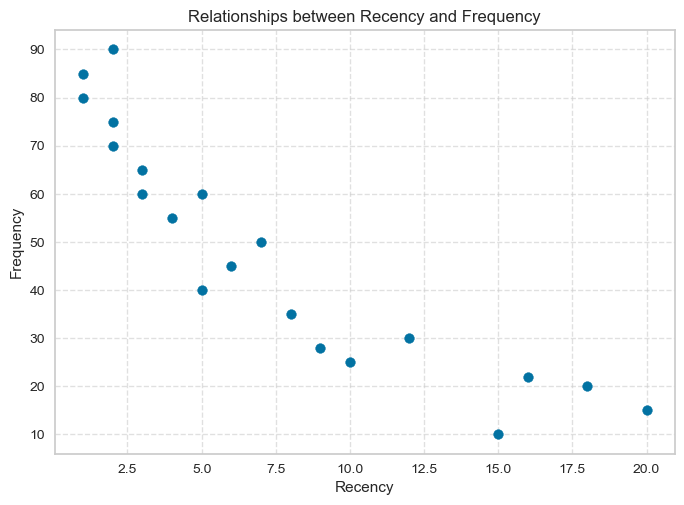

In [47]:
# To observe relationships between Recency and Frequency.
plt.scatter(df["Recency"], df["Frequency"])
plt.title("Relationships between Recency and Frequency")
plt.xlabel("Recency")
plt.ylabel("Frequency")
plt.grid(True, linestyle='--', alpha=0.6)

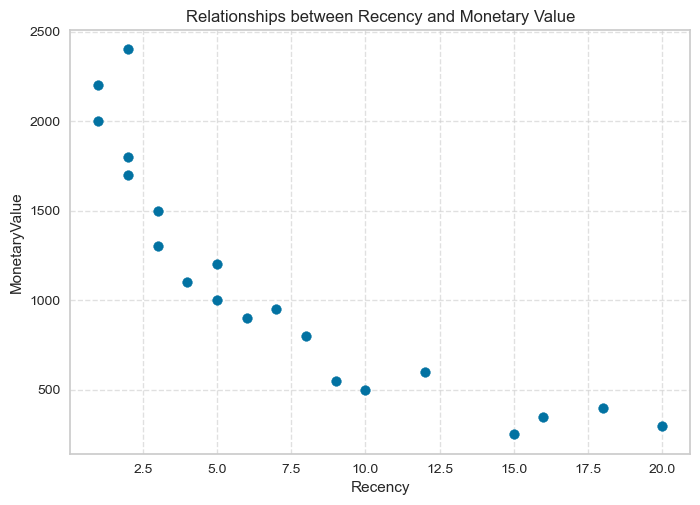

In [48]:
# To observe relationships between Recency and MonetaryValue.
plt.scatter(df["Recency"], df["MonetaryValue"])
plt.title("Relationships between Recency and Monetary Value")
plt.xlabel("Recency")
plt.ylabel("MonetaryValue")
plt.grid(True, linestyle='--', alpha=0.6)

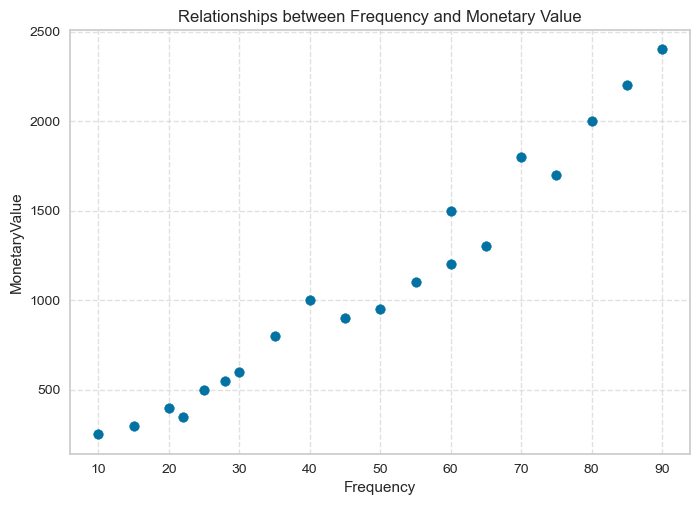

In [49]:
# To observe relationships between Frequency and MonetaryValue.
plt.scatter(df["Frequency"], df["MonetaryValue"])
plt.title("Relationships between Frequency and Monetary Value")
plt.xlabel("Frequency")
plt.ylabel("MonetaryValue")
plt.grid(True, linestyle='--', alpha=0.6)

<div style="background-color:#f1f8e9; border-left: 6px solid #689f38; padding: 15px 20px; margin: 15px 0; border-radius: 6px;">
    <h2 style="color:#33691e; margin-top:0;">4. Feature Selection for Clustering</h2>
    <p style="font-size: 15px; line-height: 1.5; color:#333;">
    KMeans is a distance-based algorithm, requiring numerical features. We explicitly select <b>'Recency'</b>, <b>'Frequency'</b>, and <b>'MonetaryValue'</b> (RFM) as our clustering features, excluding <b>'CustomerID'</b> (an identifier) and <b>'Segment'</b> (a pre-existing categorical label that we will compare our clusters against later).
    </p>
</div>

In [51]:
# Select only the numerical features for clustering
X = df[['Recency', 'Frequency', 'MonetaryValue']]
print("\nFeatures for Clustering (X):")
print(X.head())


Features for Clustering (X):
   Recency  Frequency  MonetaryValue
0       10         25            500
1        5         40           1000
2       15         10            250
3        3         60           1500
4        8         35            800


<div style="background-color:#f1f8e9; border-left: 6px solid #689f38; padding: 15px 20px; margin: 15px 0; border-radius: 6px;">
    <h2 style="color:#33691e; margin-top:0;">5. Data Standardization: Ensuring Fair Feature Contribution</h2>
    <p style="font-size: 15px; line-height: 1.5; color:#333;">
    To prevent features with larger numerical ranges (like <b>MonetaryValue</b>) from disproportionately influencing the clustering process, we standardize the data. <b>StandardScaler</b> transforms each feature to have a mean of 0 and a standard deviation of 1. This ensures all features contribute equally to the distance calculations within KMeans.
    </p>
</div>

In [53]:
# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
print("\nScaled Features (X_scaled_df):")
print(X_scaled_df.head())


Scaled Features (X_scaled_df):
    Recency  Frequency  MonetaryValue
0  0.441579  -0.959667      -0.918184
1 -0.424262  -0.333797      -0.140062
2  1.307421  -1.585537      -1.307245
3 -0.770599   0.500696       0.638060
4  0.095243  -0.542421      -0.451311


<div style="background-color:#f1f8e9; border-left: 6px solid #689f38; padding: 15px 20px; margin: 15px 0; border-radius: 6px;">
    <h2 style="color:#33691e; margin-top:0;">6. Determining the Optimal Number of Clusters: The Elbow Method</h2>
    <p style="font-size: 15px; line-height: 1.5; color:#333;">
    The <b>Elbow Method</b> is a heuristic technique to find the optimal <b>k</b> for KMeans. It plots the <b>inertia</b> (Within-Cluster Sum of Squares — WCSS) against the number of clusters. The “elbow” point, where the rate of decrease in inertia sharply changes, is often considered the optimal <b>k</b>. We use <b>yellowbrick.cluster.KElbowVisualizer</b> for a concise plot, and also demonstrate the manual calculation for conceptual understanding.
    </p>
</div>


--- Elbow Method to find Optimal K ---


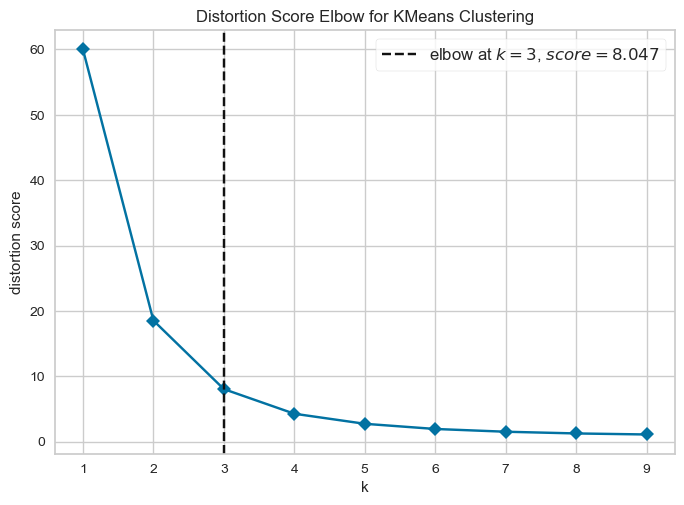

Optimal k found by KneeLocator: 3


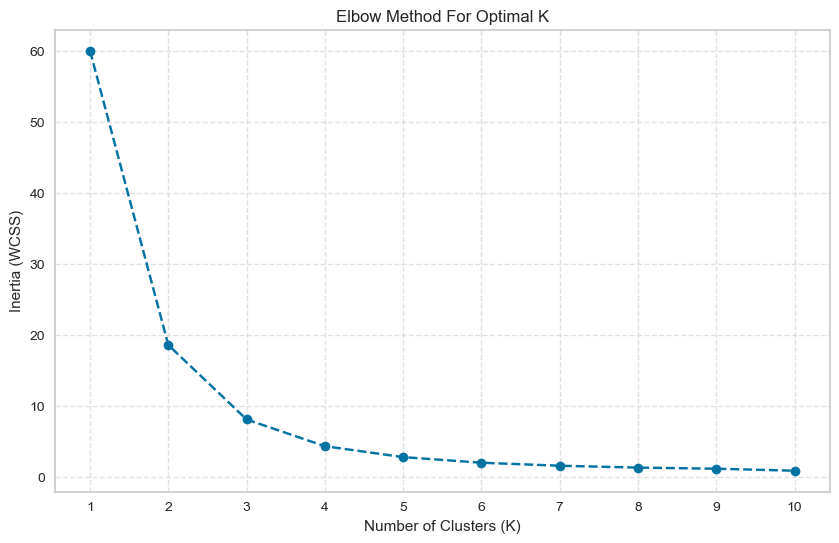

In [55]:
# Using the Yellowbrick KElbowVisualizer for a clear visualization
print("\n--- Elbow Method to find Optimal K ---")
model = KMeans(random_state=42, n_init=10) # n_init=10 to avoid warning
visualizer = KElbowVisualizer(model, k=(1,10), metric='distortion', timings=False) # distortion is another name for inertia

visualizer.fit(X_scaled)        # Fit the data to the visualizer
visualizer.show()               # Finalize and render the figure

# Alternatively, manual calculation (useful for understanding)
wcss = [] # Within-Cluster Sum of Squares (Inertia)
for i in range(1, 11): # Test k from 1 to 10
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Run KneeLocator
kneedle = KneeLocator(range(1, 11), wcss, curve='convex', direction='decreasing', interp_method='polynomial')
print(f"Optimal k found by KneeLocator: {kneedle.elbow}")

# Plotting Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (WCSS)')
plt.xticks(range(1, 11))
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

<div style="background-color:#f1f8e9; border-left: 6px solid #689f38; padding: 15px 20px; margin: 15px 0; border-radius: 6px;">
    <h2 style="color:#33691e; margin-top:0;">7. Final K-Means Clustering with Optimal K and Cluster Analysis</h2>
    <p style="font-size: 15px; line-height: 1.5; color:#333;">
    Based on the Elbow Method, <b>k=3</b> was identified as the optimal number of clusters. We now apply <b>KMeans</b> with this optimal <b>k</b>, assign the resulting clusters to a new <b>'Optimal_Cluster'</b> column, and perform a detailed analysis of each cluster’s characteristics using the unscaled original data.
    </p>
    <p style="font-size: 15px; line-height: 1.5; color:#333;">
    <b>Cluster Characteristics:</b> We examine the mean of <b>Recency</b>, <b>Frequency</b>, and <b>MonetaryValue</b> for each cluster. This is crucial for interpreting what defines each customer segment.
    </p>
    <p style="font-size: 15px; line-height: 1.5; color:#333;">
    <b>Comparison with Original Segments:</b> A cross-tabulation using <code>pd.crosstab</code> helps us compare the new K-Means clusters with the original <b>'Segment'</b> labels. This serves as a powerful validation step.
    </p>
    <p style="font-size: 15px; line-height: 1.5; color:#333;">
    The results reveal distinct customer groups:
    <ul style="font-size: 15px; line-height: 1.5; color:#333;">
        <li><b>Cluster 0:</b> “VIP/High-Value Customers” — very low Recency, very high Frequency, very high MonetaryValue.</li>
        <li><b>Cluster 1:</b> “Lapsed/Low-Value Customers” — high Recency, low Frequency, low MonetaryValue.</li>
        <li><b>Cluster 2:</b> “Regular/Mid-Value Customers” — medium Recency, medium Frequency, medium MonetaryValue.</li>
    </ul>
    </p>
    <p style="font-size: 15px; line-height: 1.5; color:#333;">
    The strong alignment between <b>Optimal_Cluster</b> and <b>Segment</b> (e.g., Cluster 0 aligns with Segment3, Cluster 1 with Segment1, and Cluster 2 mostly with Segment2) indicates that KMeans has effectively uncovered natural groupings in the data.
    </p>
</div>

In [61]:
# Creating KMeans Model for the optimum no of clustering
kmeans_model = KMeans(n_clusters = 3, random_state = 50) 
kmeans_model.fit(X_scaled)

# Adding the cluster label to the dataframe
df["Cluster"] = kmeans_model.labels_ # Inserting the label of cluster into the dataframe
df.head()

,CustomerID,Segment,Recency,Frequency,MonetaryValue,Cluster
0,1,Segment1,10,25,500,1
1,2,Segment2,5,40,1000,2
2,3,Segment1,15,10,250,1
3,4,Segment3,3,60,1500,2
4,5,Segment2,8,35,800,2


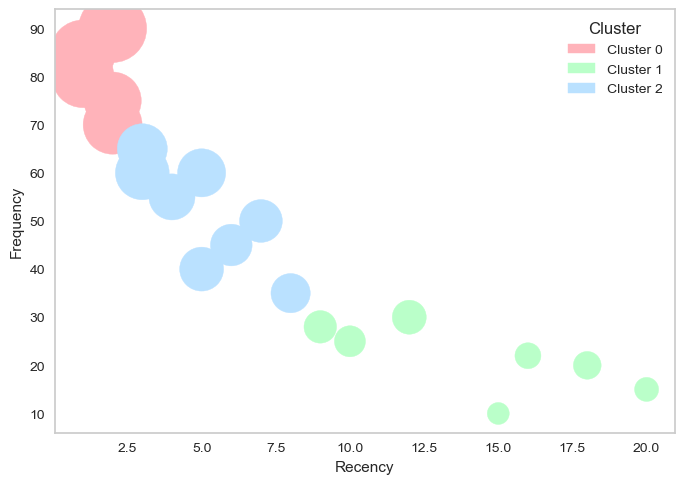

In [63]:
# Plotting the clusters against the features
colors_map = {0: '#FFB3BA', # light pink
              1: '#BAFFC9', # light green
              2: '#BAE1FF'} # light blue
colors = df["Cluster"].map(colors_map)

plt.scatter(df["Recency"], 
            df["Frequency"], 
            s = df["MonetaryValue"], # size of the bubble/points
            c = colors)
legend_handles = [
    mpatches.Patch(color=color, label=f'Cluster {cluster}') # To show the color legend in the chart
    for cluster, color in colors_map.items()
]
plt.legend(handles=legend_handles, title='Cluster')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

In [68]:
# Cluster count for optimal k
optimal_k = 3
print(f"\nCluster counts for optimal k={optimal_k}:")
print(df['Cluster'].value_counts())

# We can also group by the cluster and get descriptive statistics
cluster_descriptive_stats = df.groupby('Cluster')[['Recency', 'Frequency', 'MonetaryValue']].mean()
print("\nDescriptive statistics for each cluster:")
print(cluster_descriptive_stats)

# Compare with original segments (if applicable)
print("\nComparison of Optimal Clusters with Original Segments:")
cluster_segment_crosstab = pd.crosstab(df['Cluster'], df['Segment'])
print(cluster_segment_crosstab)


Cluster counts for optimal k=3:
Cluster
2    8
1    7
0    5
Name: count, dtype: int64

Descriptive statistics for each cluster:
           Recency  Frequency  MonetaryValue
Cluster                                     
0         1.600000  80.000000    2020.000000
1        14.285714  21.428571     421.428571
2         5.125000  51.250000    1093.750000

Comparison of Optimal Clusters with Original Segments:
Segment  Segment1  Segment2  Segment3
Cluster                              
0               0         0         5
1               7         0         0
2               0         7         1


<div style="background-color:#f1f8e9; border-left: 6px solid #689f38; padding: 15px 20px; margin: 15px 0; border-radius: 6px;">
<h4 style="color:#33691e; margin-top:0;"> Interpretation of Cross-Tabulation </h4>
    
Segment 1, labeled **At-Risk / Low**, corresponds to Main Cluster 1. This group is characterized by low engagement, inactivity, and minimal value, indicating a high likelihood of churn or disinterest. Segment 2, identified as **Loyal / Medium** and linked to Main Cluster 2, includes customers who are active, spend moderately, and show potential for further growth. Finally, Segment 3, titled **VIP / Top** and associated with Main Cluster 0, represents the most valuable customers. These individuals are highly active, spend significantly, and form the core of the customer base.

</div>